# Plotting in Python
In python, like in any programmin language, you can plot graphs. Making high-class graphs of data or simulation results is usually one key component of your published work, be it a thesis, report, or journal-publication.  

There exist a bunch of different plot libraries in python which all serve more or less the same purpose (making your coding visible) but have different utilities.  

One note: Do not use ```pylab``` as suggested by [IPython core developers](link) 


### Pandas
To create a proper dataset for plotting, we use [Pandas](http://pandas.pydata.org/) (also if you used the ```cars``` dataset, that is already a pandas-dataset), a high-level library, perfectly suited to handle your data.  
Structuring data or tools to analyse data are just some features of Pandas.

In [1]:
# KEEP ONLINE AT FALSE FOR NOW
online = False

import numpy as np
from numpy import random

if online == True:
    from altair import datasets
    dat = datasets.load_dataset('cars')
else:
    # if offline, we use this dataset of synthetic temperature, depth and thermal conductivity data
    
    depth = np.linspace(1,2000,2000)*(-1)
    T = np.zeros(2000)
    T[0] = 10
    for i in range(1,len(depth-1)):
        T[i] = T[i-1] + random.rand()/10
    # calculate Thermal Conductivities of some layers
    TC = np.zeros(2000)
    TC[0:500] = random.uniform(1.5,2.)
    TC[500:1300] = random.uniform(2.5,3.5)
    TC[1300:1500] = random.uniform(1.4,2.3)
    TC[1500:-1] = random.uniform(2.,3.)
    
    import pandas as pd
    dat = pd.DataFrame({'depth': depth,
                       'temp': T,
                       'tc': TC})
    



## Matplotlib 
Matplotlib is undeniably the most used plot library. It comprises a lot of different functions, and you can basically plot everything you like using Matplotlib. In notebooks, it is also possible to use matplotlib with magic functions, namely:
```python
%matplotlib inline
%matplotlib notebook
```

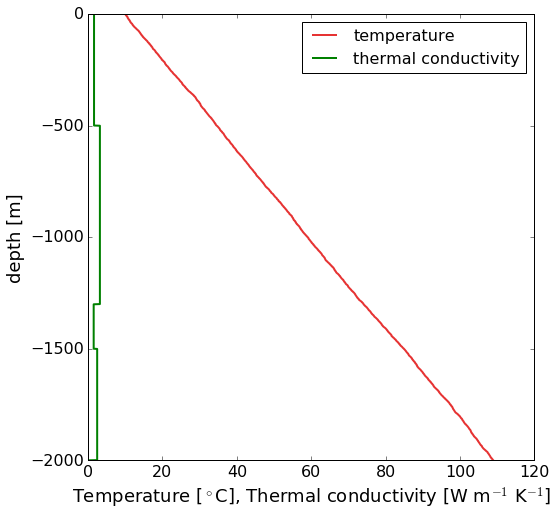

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# a usual way to create adjustable plots inline of notebooks is to create a figure space and add 
# the plot as a subplot
fig = plt.figure(figsize=(8,8))
fig.add_subplot(111)
a=plt.plot(T,depth,'-',color=(0.9,0.2,0.2),linewidth=2,label='temperature')
b=plt.plot(TC,depth,'g-',label='thermal conductivity',linewidth=2)
plt.xlabel('Temperature [$^\circ$C], Thermal conductivity [W m$^{-1}$ K$^{-1}$]',fontsize=18)
plt.ylabel('depth [m]',fontsize=18)
#getting the axes ticks in a bigger font is often desireable
plt.legend(fontsize=16)
plt.tick_params(axis='both',labelsize=16)

## Bokeh
Bokeh is a stylish interactive plot library, which allows you to chose data within your plot and *grey out* other stuff.  
Its interactive nature is quite similar to using ```%matplotlib notebook``` (btw, try to replace ```inline``` with ```notebook``` in the plot above and see how the figure (-options) change

In [3]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [4]:
source=ColumnDataSource(dat)
p = figure(title='Temperature and thermal conductivity with depth')
p.line('temp', 'depth', line_color='red',source=source,line_width=2)
p.line('tc', 'depth', line_color='green',source=source,line_width=2)
p.xaxis.axis_label = "Temperature °C"
p.xaxis.axis_line_width = 2
p.yaxis.axis_label = "Depth [m]"
p.yaxis.axis_line_width = 2
show(p)

## Plotly
[Plotly](https://plot.ly/python/) is another interactive plotting library, specialized on sharing your code and your plots online. It heavily uses ```matplotlib.pyplot``` for its features and you can create high class figures with plotly.  
But the main purpose of plotly is to share your plots. It is also available for multiple programming languages, so translating your graphs from one language to another is really simple.
<center>*"__[Plotly is a]__ python plotting library for collaborative, interactive, publication-quality graphs."*</center>  

Hover the mouse over the plot, and be impressed.

In [6]:
import plotly.offline as off
import plotly.graph_objs as go

#import plotly.plotly as py
from plotly.graph_objs import *
off.init_notebook_mode(connected=True)

trace0 = Scatter(
  x=dat['temp'],
  y=dat['depth']
)
trace1 = Scatter(
  x=dat['tc'],
  y=dat['depth']
)
data = Data([trace0, trace1])

layout = go.Layout(
    title='Temperature and thermal conductivity',
    xaxis=dict(
        title='Temperature [°C]',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='depth [m]',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)


off.iplot(data, filename = 'basic-line')

## Altair
Altair is somewhat different from the other plot-libraries, as it takes a descriptive approach towards plotting. What does that mean? It will best become clear by showing the plotting code, but let's say:  
If you type "mean x" for your x-axis label, it will directly plot the mean of your x-data.  

Altair is built around the pandas data frame. [Pandas](link) is a nice library to handle data in a csv format.

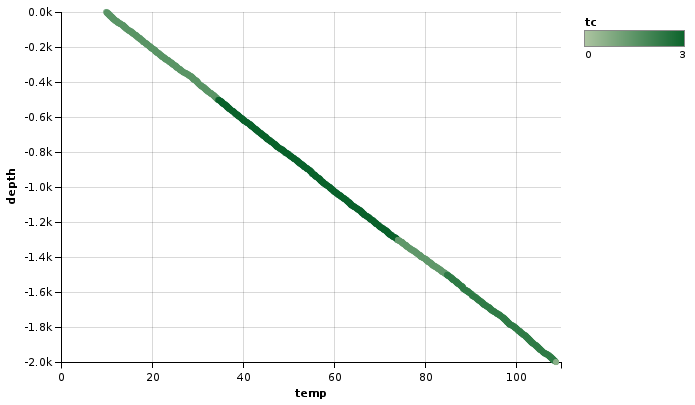

In [9]:
from altair import *
Chart(dat).mark_circle().encode(
    x='temp',
    y='depth',
    color='tc')